In [104]:
using CairoMakie
using Random
using Distributions
using SpecialFunctions
using LinearAlgebra

In [210]:
function nearest_neighbor_distance(y, data, k)
    distance = dist2(y, data)
    return sqrt.(sort(distance)[k])
end

function dist2(x, y)
    return sum(abs2.(y .- x); dims=1)[:]
end

function nearest_neighbor_kernel(x, d)
    return π^(d/2)/gamma(d/2+1) * (dist2(x, 0) .<= 1)
end

function kde_knn_estimate(y, data, k, d, N)
    knn_distance = nearest_neighbor_distance(y, data, k)
    sphere_volume = π^(d/2)/gamma(d/2+1)
    #weighted_sample = (data .- y) / knn_distance
    #return 1/(N * knn_distance^d) * sum(nearest_neighbor_kernel(weighted_sample, d))
    return k / (N * sphere_volume * knn_distance^d)
end

kde_knn_estimate (generic function with 1 method)

In [263]:
Random.seed!(123)
N = 1000
d = 4
μ = zeros(d).+1
Σ = 5*I(d)
dist = MvNormal(μ, Σ)
data = rand(dist, N)

true_pdf(x) = (2*π)^(-d/2)*det(Σ)^(-1/2)*exp.(-1/2*(x .- μ)'*(Σ\(x .- μ)))

k = 150
println(kde_knn_estimate(μ, data, k, d, N))
println(true_pdf(μ))

0.0006414866424579513
0.001013211836423378


In [268]:
query_dist = Uniform(-10, 10)
N_query_points = 25*N
query_points = rand(query_dist, N_query_points, d)
pdf_estimate = kde_knn_estimate.(eachrow(query_points), Ref(data), k, d, N);
true_values = true_pdf.(eachrow(query_points));
println(sum(true_values))
println(sum(pdf_estimate))
println(1/N_query_points * sum(abs2.(pdf_estimate - true_values)) * sum(true_values))

0.15638695813815656
0.2556422672401628
2.769863452190519e-11


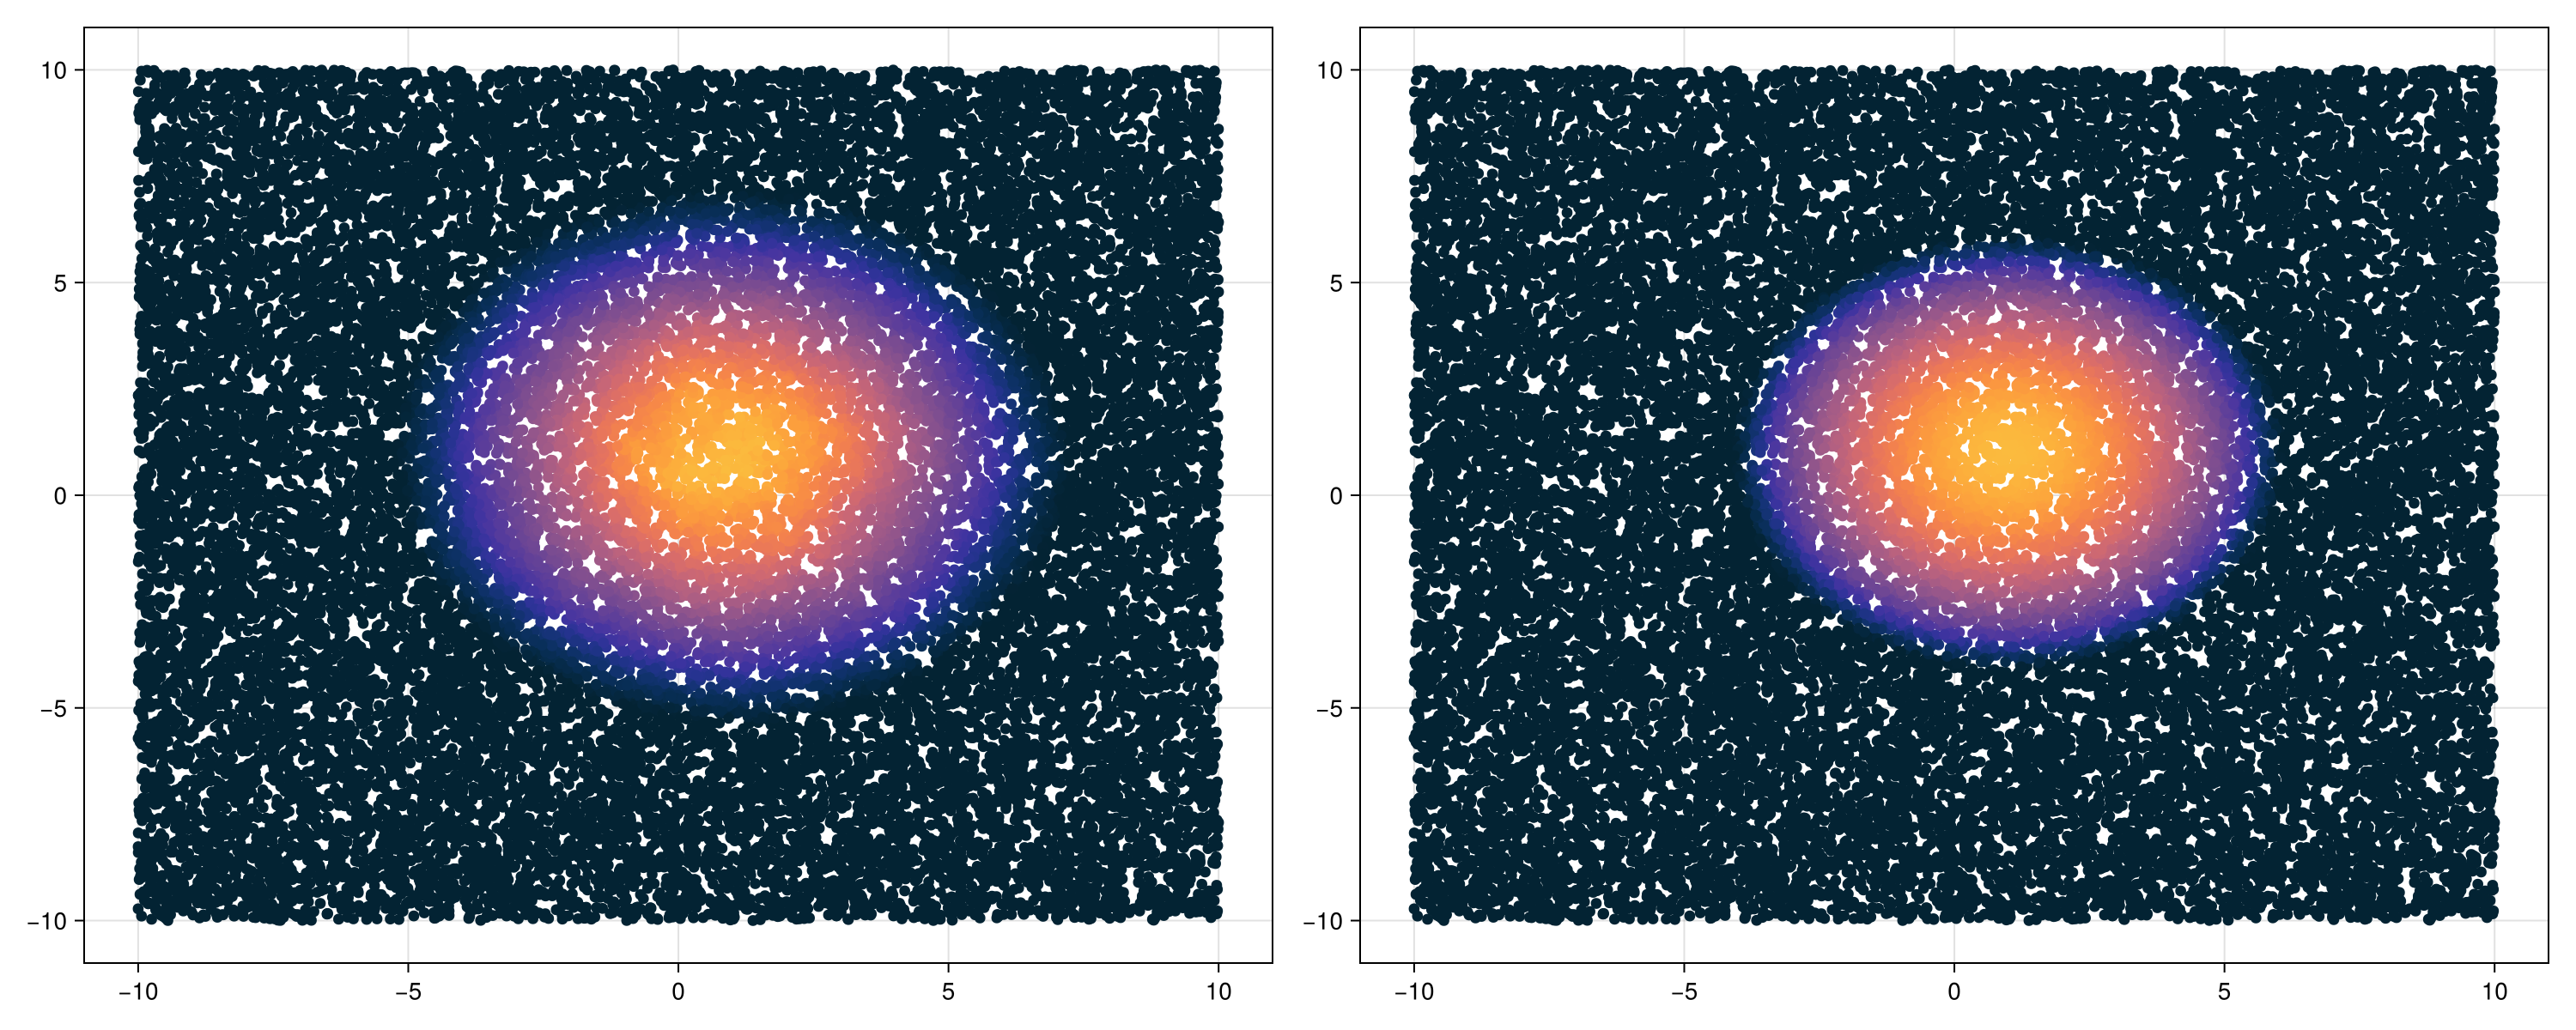

In [242]:
f = Figure(size=(1500, 600))
ax2 = Axis(f[1,1])
ax1 = Axis(f[1,2])

scatter!(ax1, query_points[:,1], query_points[:,2], colorrange=(-6,-3), color=log.(true_values), colormap = :thermal)
scatter!(ax2, query_points[:,1], query_points[:,2], colorrange=(-6,-3), color=log.(pdf_estimate), colormap = :thermal)

#lines!(ax, query_points[1,:][:], true_values)

f

In [254]:
sum(true_values)

2.6012220312985325e-9

In [252]:
sum(pdf_estimate)

4.093965139345482e-9